<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> Linear Regression 1  </h1>
</div>
<div style="line-height:0.5"> 
<h4> Linear Regression with L1 and L2 regularization + Elastic-Net 
</h4>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> PolynomialFeatures + matplotlib customizations + sklearn linear_models
</span>
</div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes, fetch_california_housing, make_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso, ElasticNet, MultiTaskElasticNet

In [3]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

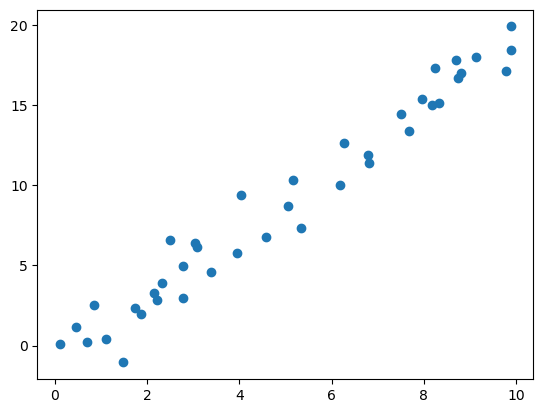

In [6]:
rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40)
plt.scatter(x,y);

In [7]:
""" LinearRegression fits a linear model with coefficients w = (w1, ..., wp), 
    to minimize the residual sum of squares between the observed targets in the dataset. 
    The targets predicted by the linear approximation.
    # copy_X=True => X will be copied; else, it may be overwritten.
    # fit_intercept =Default = True => Calculate the intercept for this model. When using False data is expected to be centered.
    # n_jobs : int, default=None => The number of jobs to use for the computation. 
        This will only provide speedup in case of sufficiently large problems.
"""
## Create the model
model = LinearRegression(fit_intercept=True)

# Arrange data
X = x[:, np.newaxis]

print(X.shape)
print()
print(X[:9])

(40, 1)

[[4.58054948]
 [3.08349607]
 [2.31487045]
 [2.77424552]
 [8.17234812]
 [1.11346636]
 [6.26437229]
 [2.76787887]
 [6.82174674]]


In [8]:
# Learn the model => the relevant parameters from the training data
model.fit(X, y)

print(f"model.coef_ is {model.coef_}")
print(f"model.intercept_ is {model.intercept_}")

model.coef_ is [1.99839352]
model.intercept_ is -0.9895459457775022


In [9]:
# Create a range of input values from -1 to 11
xfit = np.linspace(-1, 11)
# Define a new array containing the values in xfit, but reshaped as a column vector 
# This is necessary because scikit-learn expects input data to have a specific shape, which includes a column for each input feature
Xfit = xfit[:, np.newaxis]

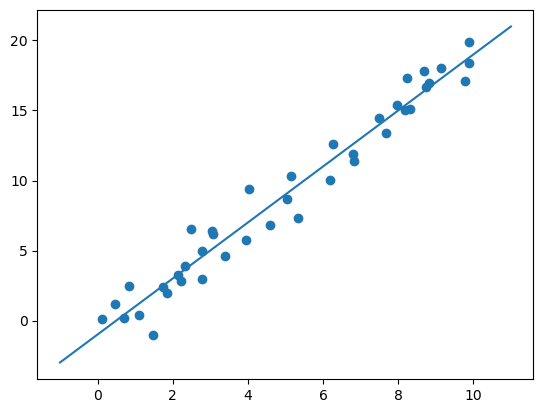

In [10]:
# Predict the previously fitted machine learning model to generate predicted output values for the input values in Xfit
yfit = model.predict(Xfit)
## Plot
plt.scatter(x, y)       #points
plt.plot(xfit, yfit);   #line

In [7]:
""" Get X features and y targets directly """
X_iris2 = iris.iloc[:, :-1]
y_iris2 = iris.iloc[:, -1:]
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris2, y_iris2, test_size=0.4, random_state=4)

In [8]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((60, 4), (60, 1))

<div style="line-height:0.45">
<h2 style="color:#26BBEE  "> Ridge regression L2 regularization  </h2>
</div>

The Ridge object is a regression estimator that can be used to predict continuous outcomes.   
It is particularly useful for linear regression problems with high dimensional data, <br>
where the number of features is much larger than the number of samples, and where regularization is needed to obtain a stable solution.

Ridge(alpha=0.5)
Ridge regression score: 0.4377561568456524
coefficients are [ 0.11306888  0.52209964 -0.13962431  0.23620447 -0.42138574 -0.30730333
 -0.05238911 -0.04050274  0.06108158 -0.05324363]

prediction y = [ 0.30631279  0.46683033 -0.66861465 -0.08738591  0.19907099 -0.19798717
 -0.43706807 -0.14930187 -1.41133157  0.40415355 -0.03301464  1.13074759
  0.10988361  0.48057319 -1.0964394 ] 


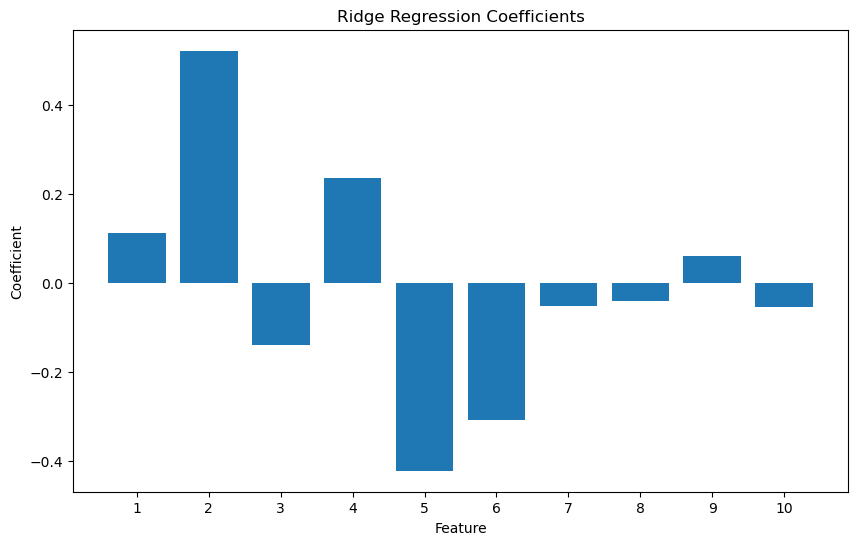

In [9]:
n_samples, n_features = 15, 10
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)
y = rng.randn(n_samples)

## Classificator 
rdg = Ridge(alpha=0.5)
#rdg = Ridge(alpha=0.5, fit_intercept=True, copy_X=True, solver='auto', max_iter=None, tol=0.001, random_state=None) 
""" --> tol: float, default=1e-3
    --> solver: {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}, default=’auto’
""" 
rdg.fit(X, y)

# Score
sco = rdg.score(X,y)
## Get the model's coefficients
coef = rdg.coef_
##Predict 
y_pred_rdg = rdg.predict(X)


print(rdg)
print("Ridge regression score: {}".format(sco))
print("coefficients are {}".format(coef))
print()
print("prediction y = {} ".format(y_pred_rdg))

## Bar plot coefficients
plt.figure(figsize=(10,6))
plt.bar(np.arange(n_features), coef)
plt.xticks(np.arange(n_features), np.arange(1, n_features+1))
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients')
plt.show()

In [10]:
print(X.shape)
print(y.shape) 
print(y_pred_rdg.shape)

(15, 10)
(15,)
(15,)


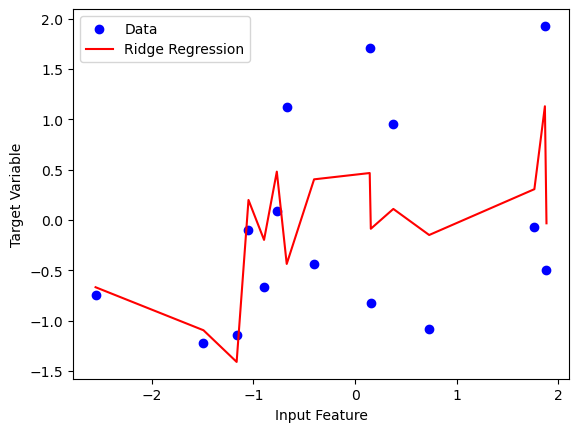

In [13]:
""" Create a scatter plot of the input feature(s) against the target variable.
I need to consider one column at the time. For instance selecting the first column of X using X[:, 0].
"""
plt.scatter(X[:, 0], y, color='blue', label='Data')

""" Sort the input feature(s) in ascending order
- "argsort()" method returns the indices that would sort the flattened array.
- Using the ravel() method to flatten the X array into a 1-dimensional array, will lead to IndexError.
"""
#sort_idx = X.ravel().argsort() 
sort_idx = X[:, 0].argsort()

# Create a line plot of the sorted input feature(s) against the corresponding predicted values  
plt.plot(X[sort_idx, 0], y_pred_rdg[sort_idx], color='red', label='Ridge Regression')  

## Add axis labels and a legend
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend(loc='upper left')
plt.show()


<h2 style="color:#26BBEE  "> Ridge regression L2 regularization  </h2>

$$
\min_{w} \frac{1}{2n} \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij}w_j)^2 + \frac{\lambda}{2} \sum_{j=1}^{p} w_j^2
$$

In [20]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

## Fit the Bayesian Ridge regression model to the training data
BayReg = BayesianRidge()
BayReg.fit(X_train, y_train)

# Predict on the test set
y_pred = BayReg.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

""" Make a new prediction using the trained model. 
- The new_data has only one sample with 10 features, so it is necessary to reshape it to have shape (1, 10), 
since Scikit-learn expects input data to be a 2-dimensional array, \ 
where each row represents a sample and each column represents a feature.
"""
new_data = np.array([0.06, -0.05, 0.03, -0.02, 0.04, 0.05, -0.06, 0.07, -0.08, 0.09]).reshape(1, -1)
prediction = BayReg.predict(new_data)

print("Bayesian Ridge regression:")
print("New data: {}".format(new_data))
print("Prediction: {}".format(prediction))
print("Mean Squared Error: {:.2f}".format(mse))
print("BayReg Coefficients: {}".format(BayReg.coef_))

Bayesian Ridge regression:
New data: [[ 0.06 -0.05  0.03 -0.02  0.04  0.05 -0.06  0.07 -0.08  0.09]]
Prediction: [163.47023772]
Mean Squared Error: 2815.04
BayReg Coefficients: [  36.78798999 -241.57327012  540.40149683  367.00859489 -204.16527314
  -21.73179977 -183.83614943  181.19273459  381.87255287   60.29831866]


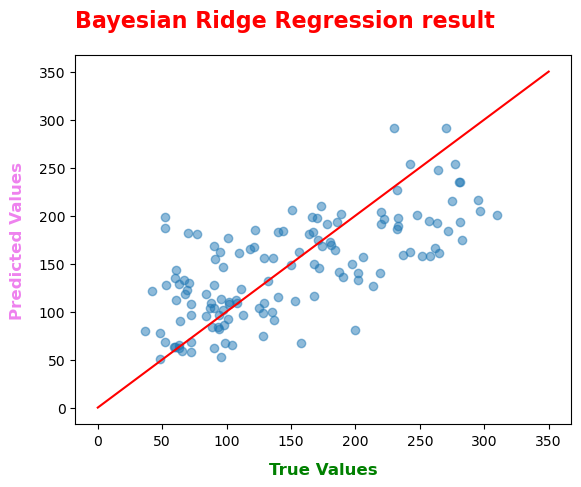

In [37]:
# Visualize the predicted values and true values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 350], [0, 350], color='red')
plt.xlabel('True Values', fontsize=12, fontweight='bold', color='green', labelpad=10)  #labelpad increase the distance from label and axis
plt.ylabel('Predicted Values', fontsize=12, fontweight='bold', color='violet', rotation=90, labelpad=10)
plt.title('Bayesian Ridge Regression result', fontsize=16, fontweight='bold', color='red', pad=20, loc='left')
plt.show()

<div style="line-height:0.45">
<h2 style="color:#26BBEE  "> LASSO (Least Absolute Shrinkage and Selection Operator) L1 Regularization  </h2>
</div>

Lasso regularization = $\lambda \left\|w\right\|_1$   

$$
\min_{w} \frac{1}{2n} \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij}w_j)^2 + \lambda \sum_{j=1}^{p} |w_j|
$$

Lasso linear regression score: 0.5318167610318159


Text(0.5, 1.0, 'Lasso Linear Regression on Boston Housing Dataset')

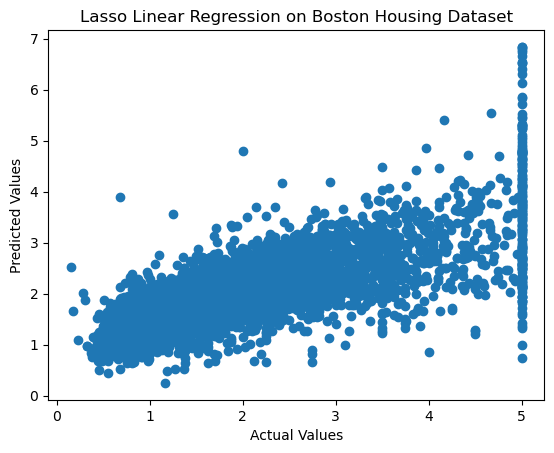

In [46]:
cali = fetch_california_housing()
X = cali.data
y = cali.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

score = lasso.score(X_test, y_test)
print("Lasso linear regression score:", score)

## Predict 
y_pred = lasso.predict(X_test)

## Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Linear Regression on Boston Housing Dataset")
#plt.show()

<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> Elastic-Net  </h1>
</div>
The Elastic-Net is a regression linear method that linearly combines both penalties L1 and L2 
of the Lasso and Ridge regression methods. <br>
Useful when there are multiple correlated features. <br>   
The difference between Lass and Elastic-Net lies in the fact that Lasso is likely to pick one of these features at random, <br>
while elastic-net is likely to pick both at once.  <br>
The advantage of such combination is that it allows 
for learning a sparse model where few of the weights are non-zero <br>
like Lasso regularization method, while still maintaining the regularization properties of Ridge.

\begin{equation*}
\min_{w} \frac{1}{2n} \left\|y - Xw\right\|^2_2 + \alpha \rho \left\|w\right\|_1 + \frac{\alpha (1 - \rho)}{2} \left\|w\right\|^2_2
\end{equation*}

Elastic Net score: 0.47583304929257797


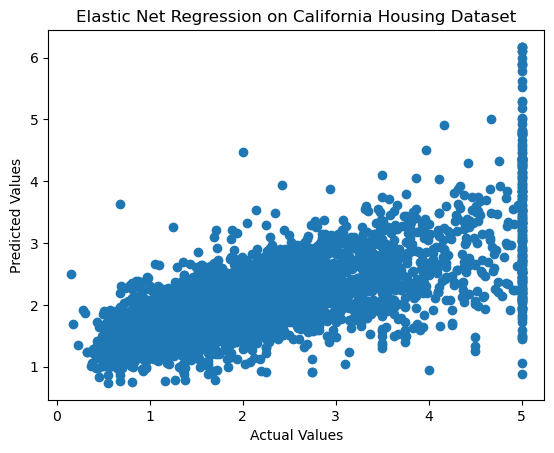

In [52]:
""" Why the vertical line in the scatter plot?
The model is making the same prediction for different input values that share the same feature value.
    The model is consistently overestimating or underestimating the target values for that particular feature value.
    Causes: 
    __Lack of relevant features to capture 
    __Nonlinear relationships difficult to capture  
    __Outliers
"""

california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  #alpha = tuning parameter to penalize the model ; l1_ratio = mixing parameter
elastic_net.fit(X_train, y_train)

# Score
score = elastic_net.score(X_test, y_test)
print("Elastic Net score:", score)
# Predict the target values for the test set
y_pred = elastic_net.predict(X_test)

######## Display 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net Regression California Housing Dataset")
plt.show()

In [57]:
alphas = [0.01, 0.1, 1.0]
l1_ratios = [0.1, 0.5, 0.9]
print("Elastic Net with:")

for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net_tuned = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net_tuned.fit(X_train, y_train)
        score_tuned = elastic_net_tuned.score(X_test, y_test)
        print(f"alpha={alpha} and l1_ratio={l1_ratio}: score={score_tuned}")

Elastic Net with:
alpha=0.01 and l1_ratio=0.1: score=0.5825039604351367
alpha=0.01 and l1_ratio=0.5: score=0.583586303522517
alpha=0.01 and l1_ratio=0.9: score=0.5844006068439824
alpha=0.1 and l1_ratio=0.1: score=0.5764479050727713
alpha=0.1 and l1_ratio=0.5: score=0.5626560643897964
alpha=0.1 and l1_ratio=0.9: score=0.5400797858138162
alpha=1.0 and l1_ratio=0.1: score=0.48536351419611
alpha=1.0 and l1_ratio=0.5: score=0.41655189098028245
alpha=1.0 and l1_ratio=0.9: score=0.31897134175230035


### => case with PolynomialFeatures:

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.915e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


Elastic Net with Polynomial Features score: 0.6367013846795619


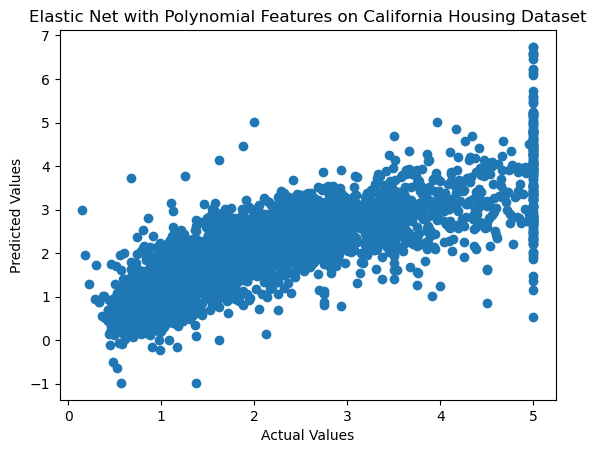

Elastic Net with alpha=0.01 and l1_ratio=0.1: score=0.5825039604351367
Elastic Net with alpha=0.01 and l1_ratio=0.5: score=0.583586303522517
Elastic Net with alpha=0.01 and l1_ratio=0.9: score=0.5844006068439824
Elastic Net with alpha=0.1 and l1_ratio=0.1: score=0.5764479050727713
Elastic Net with alpha=0.1 and l1_ratio=0.5: score=0.5626560643897964
Elastic Net with alpha=0.1 and l1_ratio=0.9: score=0.5400797858138162
Elastic Net with alpha=1.0 and l1_ratio=0.1: score=0.48536351419611
Elastic Net with alpha=1.0 and l1_ratio=0.5: score=0.41655189098028245
Elastic Net with alpha=1.0 and l1_ratio=0.9: score=0.31897134175230035


In [54]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

elastic_net_poly = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_poly.fit(X_poly_train, y_train)

score_poly = elastic_net_poly.score(X_poly_test, y_test)
print("Elastic Net with Polynomial Features score:", score_poly)

# Predict the target values for the test set
y_pred_poly = elastic_net_poly.predict(X_poly_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net with Polynomial Features on California Housing Dataset")
plt.show()

### => Handling outliers

Elastic Net score: 0.5836879009363047
reals...: [2.66  1.65  4.384 1.594]
...predictions: [2.75820315 1.56119933 2.98435508 1.4219783 ]


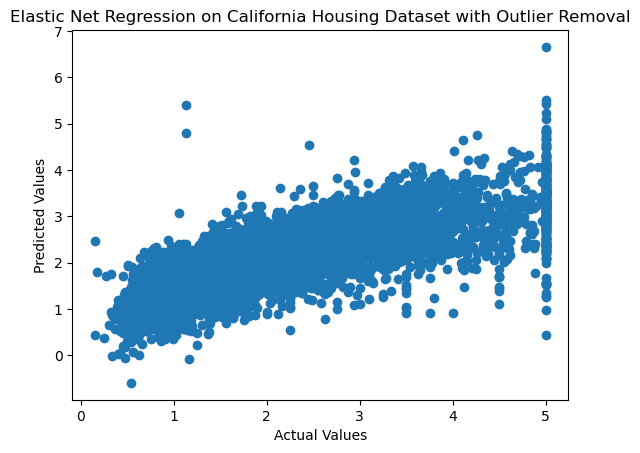

In [66]:
california = fetch_california_housing()
X = california.data
y = california.target

# Detect and remove outliers 
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X)
X = X[y_pred_lof == 1]
y = y[y_pred_lof == 1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

score = elastic_net.score(X_test, y_test)
print("Elastic Net score:", score)

## Predict 
y_pred = elastic_net.predict(X_test)
print(f"reals...: {y_test[:4]}")
print(f"...predictions: {y_pred[:4]}")

## Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net Regression on California Housing Dataset with Outlier Removal")
plt.show()

<div style="line-height:0.65">
<h2 style="color:#26BBEE  "> MultiTaskElasticNet  </h2>
</div>
An Elastic-Net model that allows to fit multiple regression problems jointly enforcing the selected features <br> to be same for all the regression problems, also called tasks.  <br>
MultiTaskElasticNet is trained with a mixed L1, L2-norm and L2 for regularisation, <br>
which estimates sparse coefficients for multiple regression problems jointly.

MultiTaskElasticNet score: 0.9976034361617057


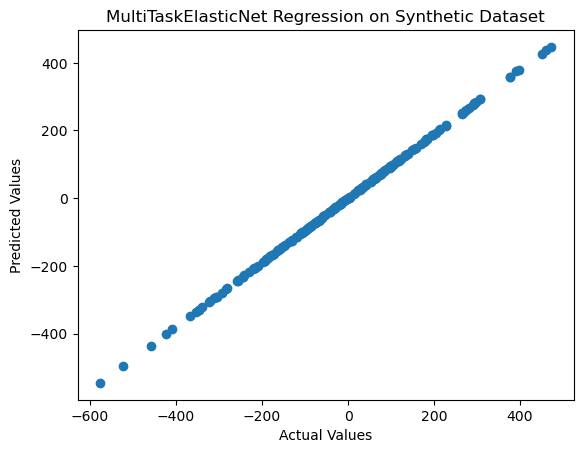

In [67]:
# Generate a synthetic dataset with 10 features and 5 targets
X, y = make_regression(n_samples=1000, n_features=10, n_targets=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit a MultiTaskElasticNet model on the training set
enet = MultiTaskElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

## Evaluate the performance of the model on the test set
score = enet.score(X_test, y_test)
print("MultiTaskElasticNet score:", score)

# Predict the target values for the test set
y_pred = enet.predict(X_test)

###### Visualize the predicted values against the actual values for the first target
plt.scatter(y_test[:, 0], y_pred[:, 0])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MultiTaskElasticNet Regression on Synthetic Dataset")
plt.show()